In [127]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [138]:
grid = True
N = 100
np.random.seed(5)
edges = np.zeros((N,N))
#mp = np.random.rand(2,N)
mp = np.zeros((2,N))
if grid:
    xx,yy  = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
    mp[0,:] = xx.reshape([1,100]);
    mp[1,:] = yy.reshape([1,100]); 
tour = np.zeros(N+1,dtype=np.int);
epochs = 100000
cost_array = np.zeros(epochs)
Tinit = 5;
Tfinal = 0.01;
T = np.zeros(epochs-1)
def reset():
    global edges, mp, tour, cost_array, grid
    edges = np.zeros((N,N))
    mp = np.random.rand(2,N)
    if grid:
        xx,yy  = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
        mp[0,:] = xx.reshape([1,100]);
        mp[1,:] = yy.reshape([1,100]); 
        tour = np.zeros(N+1,dtype=np.int);
        cost_array = np.zeros(epochs)
def generate_edges():
    global edges, mp, tour, cost_array
    for i in range(N):
        for j in range(N):
            edges[i,j] = np.linalg.norm(mp[:,i] - mp[:,j]);
    return edges
def plot_map():
    global edges, mp, tour, cost_array
    plt.plot(mp[0,:],mp[1,:],'ro',alpha=1)
    plt.show()
def initialize_tour():
    global edges, mp, tour, cost_array
    tour[0] = 0;
    tour[N] = 0;
    tour[1:N]= np.random.permutation(N-1)+1;
def plot_tour():
    global edges, mp, tour, cost_array
    plt.plot(mp[0,tour],mp[1,tour],'-bo',alpha=1)
    plt.plot(mp[0,:],mp[1,:],'ro',alpha=1)
    plt.show()
def tour_cost(route):
    global edges, mp, tour, cost_array
    cost = 0
    for i in range(N):
        f = route[i]
        s = route[i+1]
        cost += edges[f,s];
    return cost
def simulated_annealing():
    global edges, mp, tour, cost_array,T
    new_tour = np.empty_like(tour)
    cost_array[0] = tour_cost(tour)
    for k in range(1,epochs):
        T[k-1] = np.power(Tinit*(Tfinal/Tinit),k/epochs)
        #T[k-1]= Tinit + ((Tfinal-Tinit)*k)/epochs;
        #T[k-1] = Tinit -  k**(np.log(-Tfinal+Tinit)/np.log(epochs))
        #T[k-1] = 0.5*(Tinit-Tfinal)*(1 + np.cos(k*np.pi/epochs)) + Tfinal
        choices = np.random.choice(N-1,2);
        choices = choices +1
        i = min(choices)
        j = max(choices)
        new_tour = np.copy(tour);
        new_tour[i:j+1] = tour[i:j+1][::-1];
        new_cost = tour_cost(new_tour)
        delta = new_cost - cost_array[k-1]
        p = min(np.exp(-delta/T[k-1]),1)
        if np.random.rand() < p:
            tour = new_tour;
            cost_array[k] = new_cost
        else:
            cost_array[k] = cost_array[k-1]

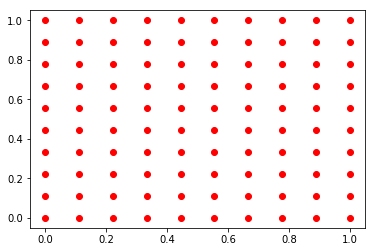

In [139]:
reset()
plot_map()

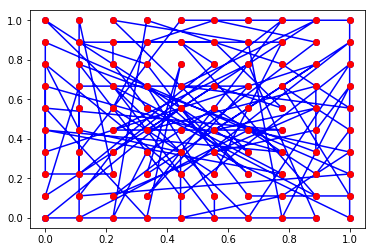

In [140]:
generate_edges()
initialize_tour()
plot_tour()

In [141]:
simulated_annealing();

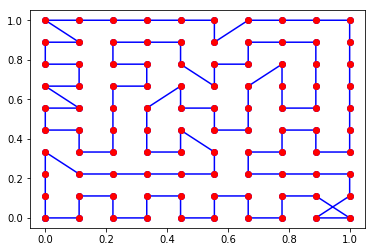

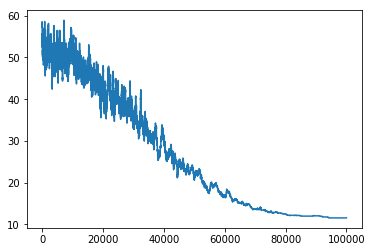

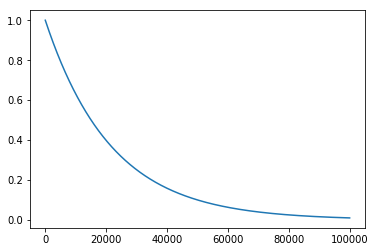

11.5713484026


In [142]:
plot_tour()
plt.plot(cost_array)
plt.show()
plt.plot(T)
plt.show()
print(cost_array[epochs-1])